Abyanandi Zaintama
H8 DSFT Batch 1

# Importing Module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis 

import warnings
from collections import Counter

In [12]:
def combine_date_time(data, date, time, drop=True, front=False):
    data['datetime'] = data[date] + ' ' + data[time]
    data.datetime = pd.to_datetime(data.datetime, infer_datetime_format=True)
    
    if drop == True:
        data.drop(columns=[date, time], inplace=True)
    
    if front == True:
        data = data.set_index('datetime').reset_index()

# defining a function to help in plotting graphs
def plot_grpah(figsize=(10,8), figtype=None, y=None, x=None, hue=None, labels=None, save=False):
    # plotting figure
    fig = plt.figure(figsize=figsize)
    
    if figtype == 'pointplot':
        ax = sns.pointplot(y=y, x=x, hue=hue)
    elif figtype == 'boxplot':
        ax = sns.boxplot(y=y, x=x, hue=hue)
    elif figtype == 'barplot':
        ax = sns.barplot(y=y, x=x, hue=hue, ci=False)
    else:
        print('figtype must be specified')
    
    # setting up labels
    fig = plt.title(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_xlabel(labels[2])
    fig = plt.legend(title=labels[3], loc='upper left', bbox_to_anchor=(1.0, 0.5), ncol=1)
    
    # exporting and showing figure
    if save == True:
        plt.savefig(fname=labels[0].replace(" ", "_").lower(), dpi=72, bbox_inches='tight')       
    
    plt.show()

# Data Loading

In [3]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [4]:
df.shape

(1000, 17)

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
combine_date_time(df,'Date','Time')

In [9]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
datetime                   datetime64[ns]
dtype: object

In [10]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


# Data Preprocessing

Data Cleaning

In [11]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
datetime                   0
dtype: int64

# EDA

What quantities at which gender-specific customers generate more gross income?

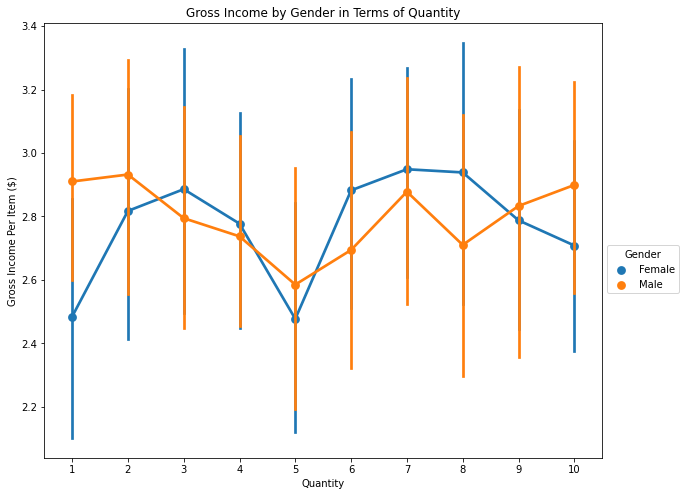

In [16]:
plot_grpah(
    figtype='pointplot', y=(df['gross income']/df['Quantity']), x=df['Quantity'], hue=df['Gender'], save=True,
    labels=['Gross Income by Gender in Terms of Quantity', 'Gross Income Per Item ($)', 'Quantity', 'Gender']
)

The graph shows that male customers generate more gross income per item when buying items at lower quantity. This is most clear at a quantity of 1. On the other hand, female customers tend to generate more gross income per item when buying at higher quantities. Clearly shown at quantities 6, 7, and 8.

How payment method affect gender-specific customer satisfaction?

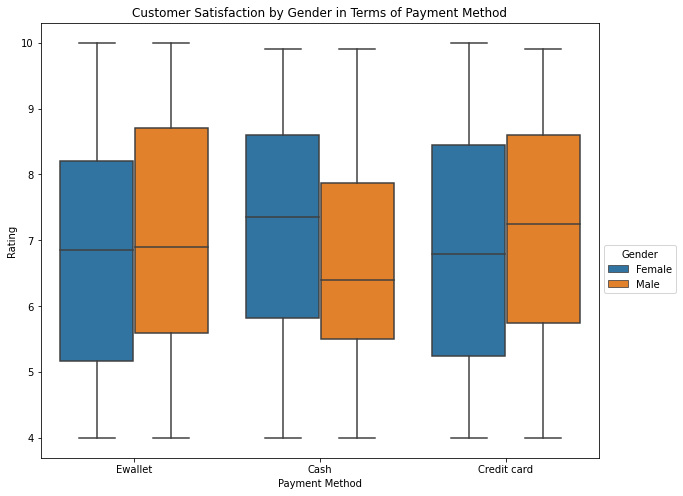

In [18]:
plot_grpah(
    figtype='boxplot', y=df['Rating'], x=df['Payment'], hue=df['Gender'], save=True,
    labels=['Customer Satisfaction by Gender in Terms of Payment Method', 'Rating', 'Payment Method', 'Gender']
)

The graph shows that male customers tend to give higher satisfaction ratings for shopping experience when they pay using e-wallets or credit cards. Female customers, contrarily, tend to give higher satisfaction ratings for shopping experience when paying in cash.

What day of the week on which certain product lines generate more gross income?

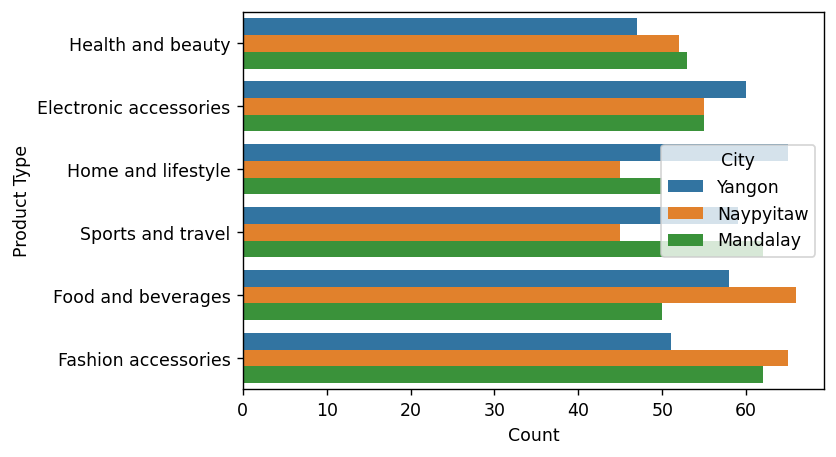

In [27]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Well, Yangon leads at Home & Lifestyle and Electronic accessories.

Naypyitaw leads at Food & Bevaerages and Fashion accessories.

Mandalay leads at Sports & Travel and Health & Beauty.

In [29]:
from wordcloud import WordCloud

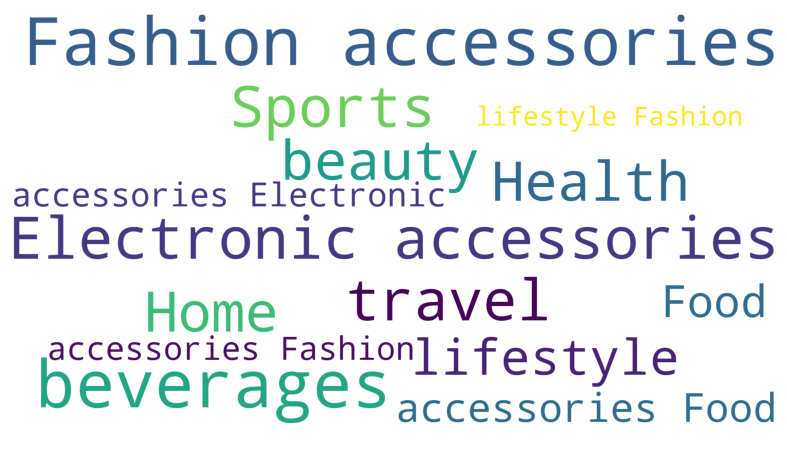

In [30]:
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

In [ ]:
plt.hist(df[''])

In [32]:
city = round(df['City'].value_counts()/len(df['City'])*100,2)

labels = list(city.index)
values = list(city.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title = 'Distribution of City', legend=dict(orientation='h'))

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [33]:
df_filter = df[['City','Branch','Product line','Quantity','gross income']]
df_filter.head(5)

,City,Branch,Product line,Quantity,gross income
0,Yangon,A,Health and beauty,7,26.1415
1,Naypyitaw,C,Electronic accessories,5,3.8200
2,Yangon,A,Home and lifestyle,7,16.2155
3,Yangon,A,Health and beauty,8,23.2880
4,Yangon,A,Sports and travel,7,30.2085


In [34]:
df_pivot = df_filter.groupby(['City','Product line']).sum()[['gross income','Quantity']].reset_index()

In [35]:
df_pivot.head(5)

,City,Product line,gross income,Quantity
0,Mandalay,Electronic accessories,811.9735,316
1,Mandalay,Fashion accessories,781.5865,297
2,Mandalay,Food and beverages,724.5185,270
3,Mandalay,Health and beauty,951.4600,320
4,Mandalay,Home and lifestyle,835.6745,295


In [36]:
df_pivot = df_pivot.pivot(index='City',columns='Product line',values='Quantity')

In [37]:
df_pivot.head(5)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,316,297,270,320,295,322
Naypyitaw,333,342,369,277,245,265
Yangon,322,263,313,257,371,333


In [40]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 68.3973
p-value: 0.0000


In [45]:
row_average = df_pivot.mean(axis=1)
pd.DataFrame({
    'Electronic accessories': row_average,
    'Fashion accessories': row_average,
    'Food and beverages': row_average,
    'Health and beauty': row_average,
    'Home and lifestyle': row_average,
    'Sports and travel': row_average,
})

,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,303.333333,303.333333,303.333333,303.333333,303.333333,303.333333
Naypyitaw,305.166667,305.166667,305.166667,305.166667,305.166667,305.166667
Yangon,309.833333,309.833333,309.833333,309.833333,309.833333,309.833333


In [48]:
import random
# Resampling approach
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect
                                  for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(df_pivot.values, expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 48164.4208
Resampled p-value: 0.0000


With the high value of chi square , there is a relation between City and a product line